In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
iris_data= pd.read_csv('iris.csv')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.shape

(150, 6)

In [7]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# Data is clean

# Data Analysis

In [11]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='Species', ylabel='count'>

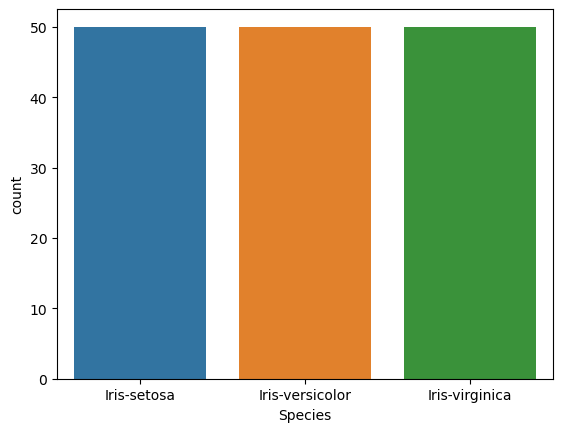

In [12]:
sns.countplot(x='Species',data=iris_data)

<Axes: xlabel='SepalWidthCm', ylabel='count'>

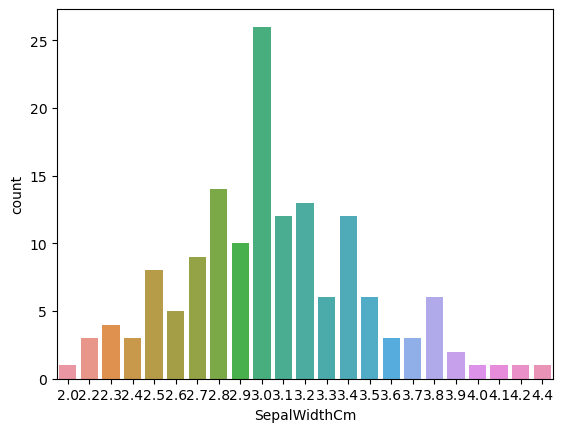

In [13]:
sns.countplot(x='SepalWidthCm', data=iris_data)

<Axes: xlabel='SepalLengthCm', ylabel='count'>

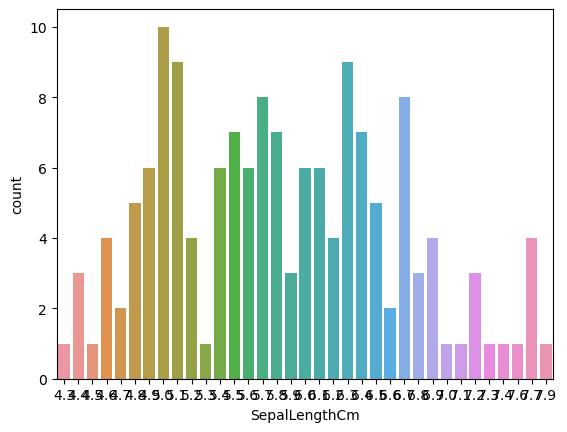

In [14]:
sns.countplot(x='SepalLengthCm', data=iris_data)

In [15]:
#drop id column wount be needed
iris_data.drop(columns = 'Id', axis=1, inplace=True )

In [16]:
#encode the species for proper evaluation
label_encode = LabelEncoder()


In [17]:
iris_data['Species']=label_encode.fit_transform(iris_data['Species'])

In [18]:
x = iris_data.drop(['Species'], axis = 1)
y = iris_data['Species']

# Splitting data into testing and training


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [20]:
print (x)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [21]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


# Model deployment 
using logistic regression

In [22]:
lm = LogisticRegression()

In [23]:
lm.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = lm.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the training set
y_pred_train = lm.predict(x_train)

# Calculate and print the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

Test Accuracy: 0.97
Training Accuracy: 0.98


In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Logistic Regression): {:.2f}%".format(accuracy * 100))


Accuracy (Logistic Regression): 96.67%


In [31]:
from sklearn.metrics import classification_report

In [32]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      0.92      0.96        13\n           2       0.86      1.00      0.92         6\n\n    accuracy                           0.97        30\n   macro avg       0.95      0.97      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

# using Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt= DecisionTreeClassifier()

In [35]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
dt.predict(x_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [37]:
dt_pred = dt.predict(x_test)

In [38]:
test_accuracy = accuracy_score(y_test, dt_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the training set
dt_pred_train = dt.predict(x_train)

# Calculate and print the accuracy on the training set
train_accuracy = accuracy_score(y_train, dt_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

Test Accuracy: 0.97
Training Accuracy: 1.00


In [39]:
classification_report(y_test,dt_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      0.92      0.96        13\n           2       0.86      1.00      0.92         6\n\n    accuracy                           0.97        30\n   macro avg       0.95      0.97      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [40]:
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy (Decison Tree): {:.2f}%".format(accuracy * 100))

Accuracy (Decison Tree): 96.67%


# using KNN MODEL

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
kn = KNeighborsClassifier()

In [43]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
kn.predict(x_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [45]:
kn_predi = kn.predict(x_test)

In [46]:
classification_report(y_test,kn_predi)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00         6\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [47]:
test_accuracy = accuracy_score(y_test, kn_predi)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the training set
kn_pred_train = kn.predict(x_train)

# Calculate and print the accuracy on the training set
train_accuracy = accuracy_score(y_train, kn_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

Test Accuracy: 1.00
Training Accuracy: 0.96


# Model accuracy for the 3 models used 

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Logistic Regression): {:.2f}%".format(accuracy * 100))


Accuracy (Logistic Regression): 96.67%


In [49]:
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy (Decison Tree): {:.2f}%".format(accuracy * 100))

Accuracy (Decison Tree): 96.67%


In [51]:
accuracy = accuracy_score(y_test, kn_predi)
print("KNeighborsClassifier): {:.2f}%".format(accuracy * 100))

KNeighborsClassifier): 100.00%
